In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as scp
import os
import glob

In [2]:
df = pd.read_csv('virtualInternshipData_ADS2001_utf8.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19175,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2
19177,367,o,19181,PESPVP,"Well, we are out of time for our meeting.",6,Mentor,Reflection team discussion of first batch results,0,0,0,0,0,0,4,9
19178,393,o,19182,PESPVP,Precisely,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,1


In [3]:
df['userIDs'] = df['userIDs'].astype(str)
df['Line_ID'] = df['Line_ID'].astype(str)
df['unique_id'] = df[('userIDs')] + df['implementation'] + df['ChatGroup']
df = df[['unique_id', 'userIDs', 'implementation', 'Line_ID', 'ChatGroup', 'content', 'group_id', 'RoleName', 'roomName', 'm_experimental_testing', 'm_making_design_choices', 'm_asking_questions', 'j_customer_consultants_requests', 'j_performance_parameters_requirements', 'j_communication', 'OutcomeScore', 'wordCount']]

In [4]:
df

,unique_id,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1aPRNLT,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,1aPRNLT,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,1aPRNLT,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,1aPRNLT,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,1aPRNLT,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19175,392oPESPVP,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,388oPESPVP,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2
19177,367oPESPVP,367,o,19181,PESPVP,"Well, we are out of time for our meeting.",6,Mentor,Reflection team discussion of first batch results,0,0,0,0,0,0,4,9
19178,393oPESPVP,393,o,19182,PESPVP,Precisely,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,1


### Checking for missing values

In [5]:
df.isna().sum() # check for missing values

unique_id                                0
userIDs                                  0
implementation                           0
Line_ID                                  0
ChatGroup                                0
content                                  0
group_id                                 0
RoleName                                 3
roomName                                 0
m_experimental_testing                   0
m_making_design_choices                  0
m_asking_questions                       0
j_customer_consultants_requests          0
j_performance_parameters_requirements    0
j_communication                          0
OutcomeScore                             0
wordCount                                0
dtype: int64

In [6]:
df = df.dropna() # dropping rows with missing values as it only makes up for 3/19180 rows

In [7]:
df.isna().sum()

unique_id                                0
userIDs                                  0
implementation                           0
Line_ID                                  0
ChatGroup                                0
content                                  0
group_id                                 0
RoleName                                 0
roomName                                 0
m_experimental_testing                   0
m_making_design_choices                  0
m_asking_questions                       0
j_customer_consultants_requests          0
j_performance_parameters_requirements    0
j_communication                          0
OutcomeScore                             0
wordCount                                0
dtype: int64

# Data analysis

In [8]:
# data frame for each chat topic
# includes messages which have a combination of topics
# explore relationship between number of messages per topic to score
experimental_testing = df[df['m_experimental_testing'] == 1]
design_choices = df[df['m_making_design_choices'] == 1]  
asking_questions = df[df['m_asking_questions'] == 1]
customer_consultant_requests = df[df['j_customer_consultants_requests'] == 1]
performance_parameters_requirements = df[df['j_performance_parameters_requirements'] == 1]

### Number of groups

In [9]:
df['group_id'].unique()

array([2, 3, 4, 5, 6], dtype=int64)

### Number of participants

In [10]:
len(df['userIDs'].unique())

392

### Number of mentors

In [11]:
mentors_only = df[df['RoleName'] == 'Mentor']
print(f"There are {len(mentors_only['userIDs'].unique())} mentors")
mentors_only['userIDs'].unique()

There are 23 mentors


array(['1', '22', '37', '52', '63', '90', '107', '117', '134', '144',
       '150', '173', '201', '227', '254', '278', '301', '328', '333',
       '338', '343', '349', '367'], dtype=object)

### Creating student only dataframe

In [12]:
students_only = df[df['RoleName'] == 'Player']

In [13]:
students_only

,unique_id,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
5,2aPRNLT,2,a,6,PRNLT,Hello I am Brandon!,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,4
6,3aPRNLT,3,a,7,PRNLT,I am Zelin,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,3
7,3aPRNLT,3,a,8,PRNLT,Hi,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,1
8,4aPRNLT,4,a,9,PRNLT,i am jack,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,3
9,5aPRNLT,5,a,10,PRNLT,Hey! I'm Rachel!,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19173,391oPESPVP,391,o,19177,PESPVP,exactly!,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19174,389oPESPVP,389,o,19178,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,7,2
19175,392oPESPVP,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,388oPESPVP,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2


### Create data frame for each group

In [14]:
group_2 = students_only[students_only['group_id'] == 2]
group_3 = students_only[students_only['group_id'] == 3]
group_4 = students_only[students_only['group_id'] == 4]
group_5 = students_only[students_only['group_id'] == 5]
group_6 = students_only[students_only['group_id'] == 6]

In [15]:
print(f"There are {len(group_2['userIDs'].unique())} students in group 2")
print(f"There are {len(group_3['userIDs'].unique())} students in group 3")
print(f"There are {len(group_4['userIDs'].unique())} students in group 4")
print(f"There are {len(group_5['userIDs'].unique())} students in group 5")
print(f"There are {len(group_6['userIDs'].unique())} students in group 6")


There are 78 students in group 2
There are 73 students in group 3
There are 75 students in group 4
There are 72 students in group 5
There are 71 students in group 6


### Average score of each group

In [16]:
average_scores = pd.DataFrame()
average_scores['group'] = students_only['group_id'].unique()

outcome_scores = students_only.groupby('group_id')['OutcomeScore'].mean().reset_index()

average_scores = average_scores.merge(outcome_scores, how='left', left_on='group', right_on='group_id')

In [17]:
average_scores = average_scores.drop(columns = ['group_id'])
average_scores

,group,OutcomeScore
0,2,3.410944
1,3,3.672073
2,4,3.781714
3,5,4.087102
4,6,3.636873


### Table of scores of students

In [18]:
student_scores = pd.DataFrame()
student_scores['student'] = students_only['userIDs'].unique()

outcome_scores = students_only.groupby('userIDs')['OutcomeScore'].mean().reset_index()

student_scores = student_scores.merge(outcome_scores, how = 'left', left_on = 'student', right_on = 'userIDs')
student_scores

,student,userIDs,OutcomeScore
0,2,2,4.0
1,3,3,4.0
2,4,4,4.0
3,5,5,2.0
4,6,6,2.0
...,...,...,...
364,389,389,7.0
365,390,390,4.0
366,391,391,5.0
367,392,392,5.0


# Current Data frames we have
1. students_only - data frame with only student data
2. mentors_only - data frame with only mentor data
3. experimental_testing 
4. design_choices 
5. asking_questions
6. customer_consultant_requests 
7. performance_parameters_requirements 

# Creating GROUP LEVEL DATA (USE THIS FOR ANALYSIS)

In [19]:
group_level_data = students_only.groupby('group_id').agg(
mean_outcome_score = ('OutcomeScore', 'mean'),
total_experimental_testing = ("m_experimental_testing", 'sum'),
total_making_design_choices = ("m_making_design_choices", 'sum'),
total_asking_questions = ("m_asking_questions", 'sum'),
total_customer_consultants_requests = ("j_customer_consultants_requests", 'sum'),
total_performance_parameters_requirements = ("j_performance_parameters_requirements", 'sum'))


In [20]:
group_level_data

,mean_outcome_score,total_experimental_testing,total_making_design_choices,total_asking_questions,total_customer_consultants_requests,total_performance_parameters_requirements
group_id,,,,,,
2,3.410944,102,349,617,63,202
3,3.672073,61,333,601,86,173
4,3.781714,154,357,644,56,187
5,4.087102,111,356,519,54,160
6,3.636873,91,314,535,44,179


# Creating STUDENT LEVEL DATA (USE THIS FOR ANALYSIS)

In [21]:
student_level_data = students_only.groupby('userIDs').agg(
mean_outcome_score = ('OutcomeScore', 'mean'),
total_experimental_testing = ("m_experimental_testing", 'sum'),
total_making_design_choices = ("m_making_design_choices", 'sum'),
total_asking_questions = ("m_asking_questions", 'sum'),
total_customer_consultants_requests = ("j_customer_consultants_requests", 'sum'),
total_performance_parameters_requirements = ("j_performance_parameters_requirements", 'sum'))

In [22]:
student_level_data.index = student_level_data.index.astype(int)
student_level_data = student_level_data.sort_index()
student_level_data


,mean_outcome_score,total_experimental_testing,total_making_design_choices,total_asking_questions,total_customer_consultants_requests,total_performance_parameters_requirements
userIDs,,,,,,
2,4.0,2,4,17,0,4
3,4.0,1,4,3,0,1
4,4.0,2,2,3,1,5
5,2.0,0,0,6,0,2
6,2.0,0,2,7,1,3
...,...,...,...,...,...,...
389,7.0,2,8,4,1,7
390,4.0,0,5,6,1,2
391,5.0,2,3,11,1,4


# Multivariate Linear Regression

Categorical Variable On Whole dataset

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
import seaborn as sns

In [24]:
df = pd.get_dummies(df, columns=['RoleName']) #convert RoleName to dummy variables

In [25]:
df.head()

,unique_id,userIDs,implementation,Line_ID,ChatGroup,content,group_id,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount,RoleName_Mentor,RoleName_Player
0,1aPRNLT,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5,1,0
1,1aPRNLT,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11,1,0
2,1aPRNLT,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9,1,0
3,1aPRNLT,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51,1,0
4,1aPRNLT,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39,1,0


In [26]:
#feature variables
X = df[['RoleName_Mentor', 'RoleName_Player' , 'm_experimental_testing', 'm_making_design_choices', 'm_asking_questions', 'j_customer_consultants_requests', 'j_performance_parameters_requirements', 'j_communication']]
y = df['OutcomeScore']
# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2,
    random_state= np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) \
# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  # Get model predictions for both.
testing_predictions = linear.predict(X_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.006266,1.462461,1.073967
test,0.004221,1.449151,1.053082


Normalise

In [27]:
nX =(X-X.mean())/X.std() # create nX, a normalised version of X
nX.describe() # show the descriptive statistics of nX

,RoleName_Mentor,RoleName_Player,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
count,1.917700e+04,1.917700e+04,1.917700e+04,1.917700e+04,1.917700e+04,1.917700e+04,1.917700e+04,1.917700e+04
mean,4.446218e-18,-5.335462e-17,2.667731e-17,-7.669727e-17,-2.519524e-17,2.371316e-17,4.594426e-17,-6.076498e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.668684e-01,-2.725631e+00,-1.719906e-01,-3.386394e-01,-4.796576e-01,-1.359454e-01,-2.347931e-01,-1.466941e-01
25%,-3.668684e-01,3.668684e-01,-1.719906e-01,-3.386394e-01,-4.796576e-01,-1.359454e-01,-2.347931e-01,-1.466941e-01
50%,-3.668684e-01,3.668684e-01,-1.719906e-01,-3.386394e-01,-4.796576e-01,-1.359454e-01,-2.347931e-01,-1.466941e-01
75%,-3.668684e-01,3.668684e-01,-1.719906e-01,-3.386394e-01,-4.796576e-01,-1.359454e-01,-2.347931e-01,-1.466941e-01
max,2.725631e+00,3.668684e-01,5.813969e+00,2.952840e+00,2.084712e+00,7.355508e+00,4.258847e+00,6.816553e+00


In [29]:
nX =(X-X.mean())/X.std() # create nX, a normalised version of X
nX.describe() # show the descriptive statistics of nX
# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, y, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  # Get model predictions for both.
testing_predictions = linear.predict(X_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.006252,1.462472,1.074433
test,0.004116,1.449228,1.053603


Modelling the dataset on dummy variables gives poor r^2 score, hence utilise group and student level data

Student Level

In [33]:
#feature variables
X_student = student_level_data.drop(['mean_outcome_score'],axis=1)
y_student = student_level_data['mean_outcome_score']
# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    X_student, y_student, test_size=0.2,
    random_state= np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) \
# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  # Get model predictions for both.
testing_predictions = linear.predict(X_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.061006,1.534098,1.231305
test,0.024765,1.834847,1.477398


Better r^2 score

Analysis of coefficients - Student Level Data: to get an idea of the importance of each variable in predicting mean outcome score

In [34]:
feature_names = X_student.columns.tolist() # write the column names to a list

# create a Series for which the rows are the feature names and the data is 
# the regression coefficient values
coefficients = pd.Series(data=linear.coef_.transpose(), index=feature_names)
coefficients

total_experimental_testing                   0.154869
total_making_design_choices                  0.053791
total_asking_questions                      -0.012518
total_customer_consultants_requests          0.043700
total_performance_parameters_requirements    0.022224
dtype: float64

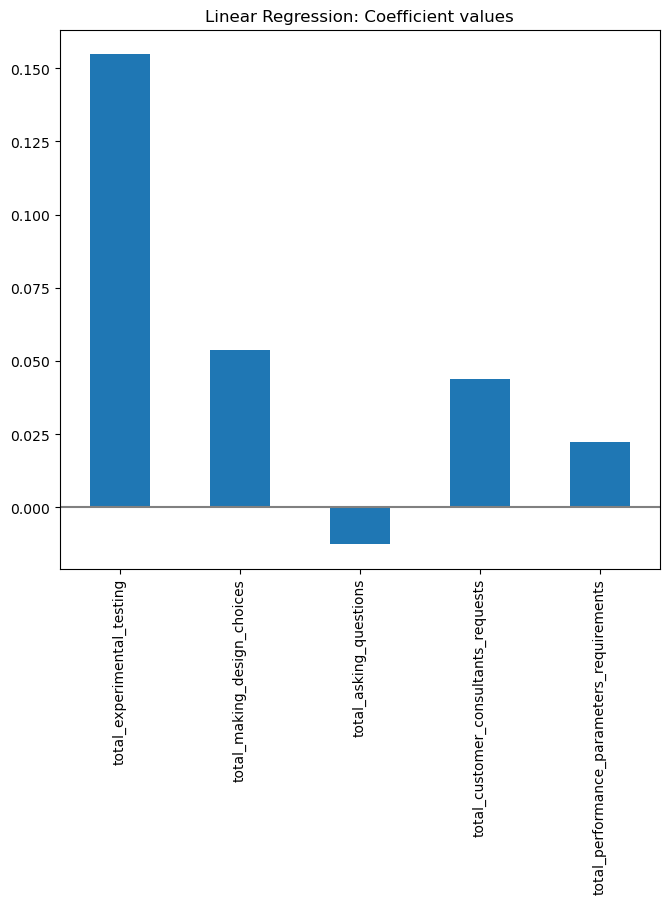

In [35]:
coefficients.plot(kind='bar', figsize=(10, 7)) # plot these as a bar plot
plt.title('Linear Regression: Coefficient values') # add a title
plt.axhline(y=0, color='.5') # add the reference line y = 0
plt.subplots_adjust(left=.3) # move to the left a little bit

preceeding plot shows a slight quadratic relation

Variability of features - student level data

In [36]:
X_train.std(axis = 0)

total_experimental_testing                   1.803644
total_making_design_choices                  3.656413
total_asking_questions                       7.250054
total_customer_consultants_requests          1.236461
total_performance_parameters_requirements    2.072184
dtype: float64

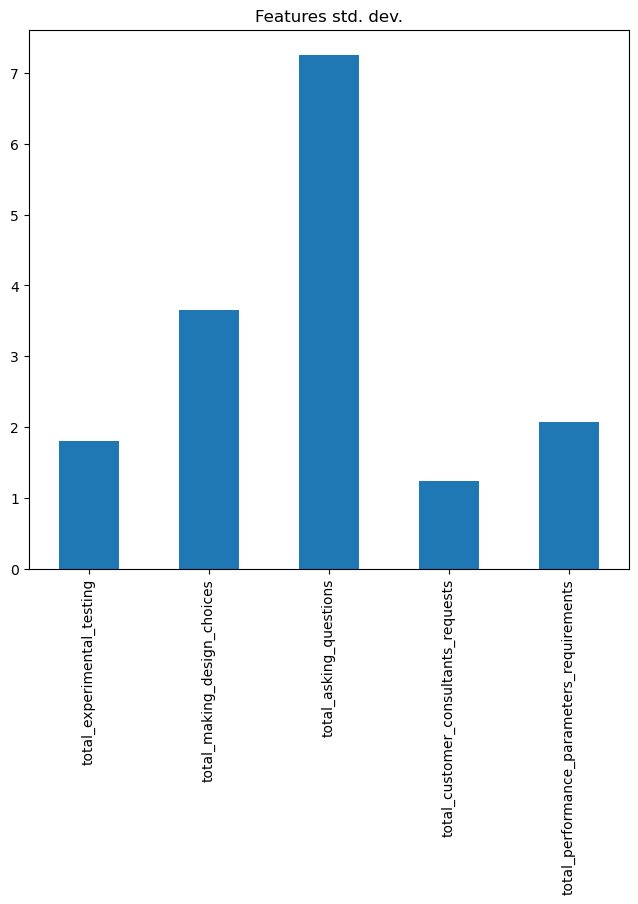

In [37]:
X_train.std(axis=0).plot(kind='bar', figsize=(10, 7)) # plot the standard deviation of the training set features
plt.title('Features std. dev.') # add a title
plt.subplots_adjust(left=.3) # move a bit to the left

Plot suggests total asking questions and total making design choices have significant effects on predicting mean outcome score, however to take account of variability, multiply the coefficient by the standard deviation for each feature.

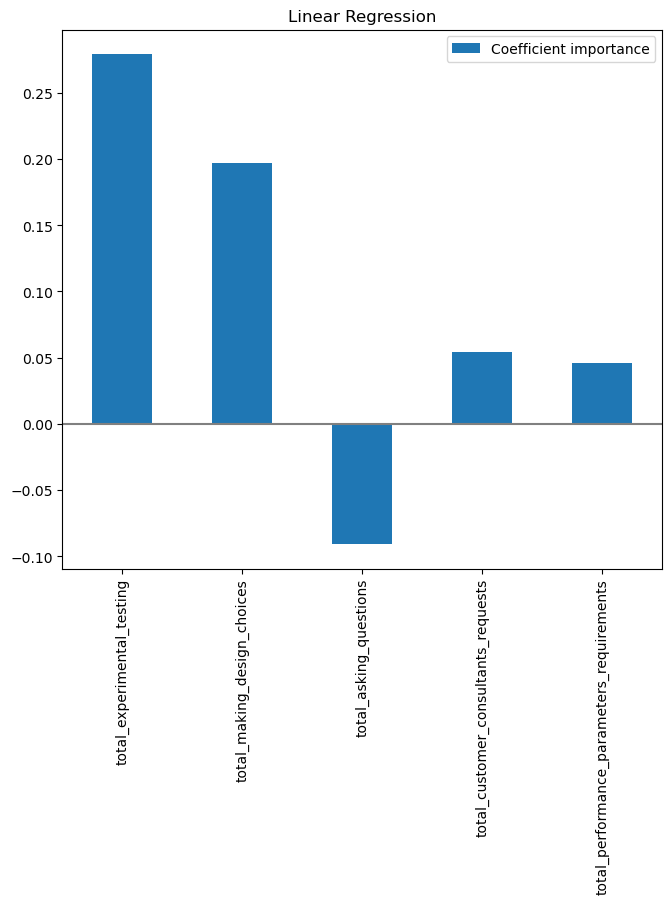

In [38]:
# create a dataframe with the columns being the feature names and regression coefficients multiplied by the 
# standard deviation
coefs = pd.DataFrame(
    linear.coef_ * X_train.std(axis=0),
    columns=['Coefficient importance'], index=feature_names
)
# do a similar plot of this variable, as above
coefs.plot(kind='bar', figsize=(10, 7))
plt.title('Linear Regression')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.3)

From multivariate linear regression, suggests total_experimental_testing, total_making_design_choices and total_asking_questions have the highest coefficient importance.
More the teams talk about using experimental techniques to understand the technical features of a design, result in better outcome score.
When teams talk about choosing a specification or characteristic for a design, impacts outcome score.

Normalising features - student level data: To compare the importance of the coefficients and normalise the independent variables

In [41]:
nX_student =(X_student-X_student.mean())/X_student.std() # create nX, a normalised version of X
nX_student.describe() # show the descriptive statistics of nX

,total_experimental_testing,total_making_design_choices,total_asking_questions,total_customer_consultants_requests,total_performance_parameters_requirements
count,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02
mean,2.888385e-17,6.258168e-17,4.813975e-18,-1.925590e-17,4.813975e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.088055e-01,-1.285083e+00,-1.131795e+00,-6.893246e-01,-1.166287e+00
25%,-7.088055e-01,-7.301439e-01,-7.021324e-01,-6.893246e-01,-6.886402e-01
50%,-2.048571e-01,-1.752045e-01,-2.724693e-01,-6.893246e-01,-2.109931e-01
75%,2.990913e-01,3.797350e-01,4.436359e-01,1.501499e-01,2.666539e-01
max,6.850420e+00,5.651660e+00,6.888582e+00,6.865946e+00,5.520771e+00


In [42]:
# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX_student, y_student, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  # Get model predictions for both.
testing_predictions = linear.predict(X_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.061006,1.534098,1.231305
test,0.024765,1.834847,1.477398


Same r^2 score: overall with low r^2 scores for all models, linear modelling not suitable